

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Avançamos bem nessa iteração! Muito bom!
    
Estamos quase lá! Foque por favor nos pontos indicados como v2 e chegaremos a aprovação.
    
Até breve!
</div>

In [1]:
#Importando as bibliotecas
import pandas as pd
import requests
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#Lendo os arquivos
results_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
results_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
#Verificando os dados dos arquivos
results_01

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
results_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
results_04

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [6]:
results_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


In [7]:
results_04.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
#Criando o grafico referente ao numero de corridas por empresa de taxi
results_01_sort = results_01.sort_values(by='trips_amount', ascending=False).head(15)
results_01_sort

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


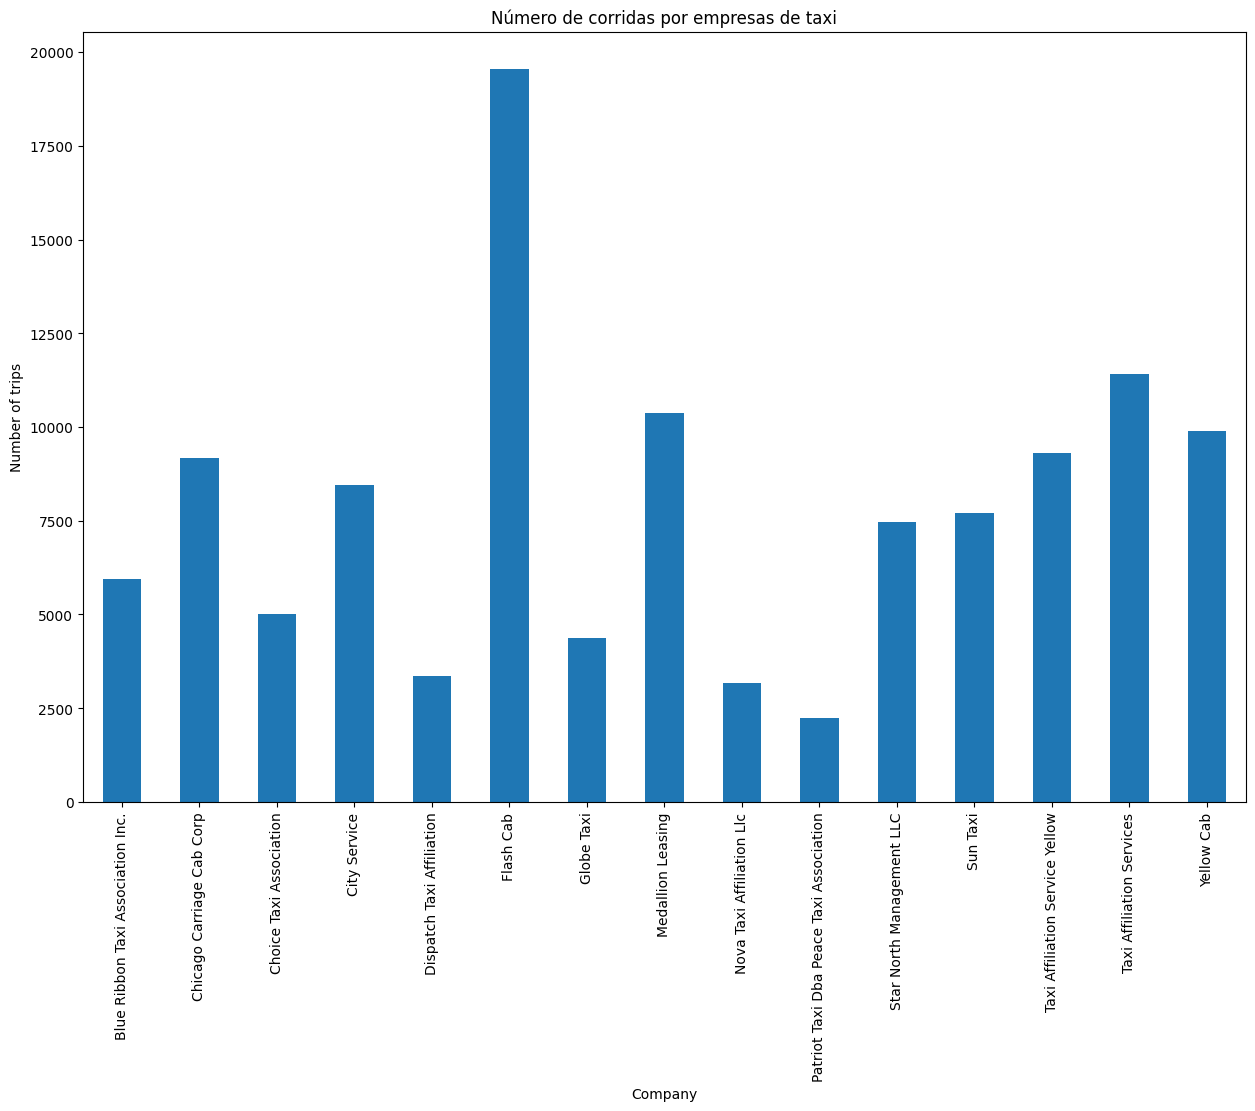

In [9]:
group_trips = results_01_sort.groupby('company_name')['trips_amount'].sum()
group_trips.plot(xlabel='Company',
                 ylabel='Number of trips',
                 x='company_name',
                 y='trips_amount',
                 kind = 'bar',
                 figsize=(15, 10),
                 title='Número de corridas por empresas de taxi')

plt.show()

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

O gráfico das empresas está ok, mas poderíamso eliminar empresas menos relevantes para facilitar a leitura
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>



In [10]:
#Criando um grfico para a media de viagens por lugar de destino
results_04_sort = results_04.sort_values(by='average_trips', ascending=False).head(10)

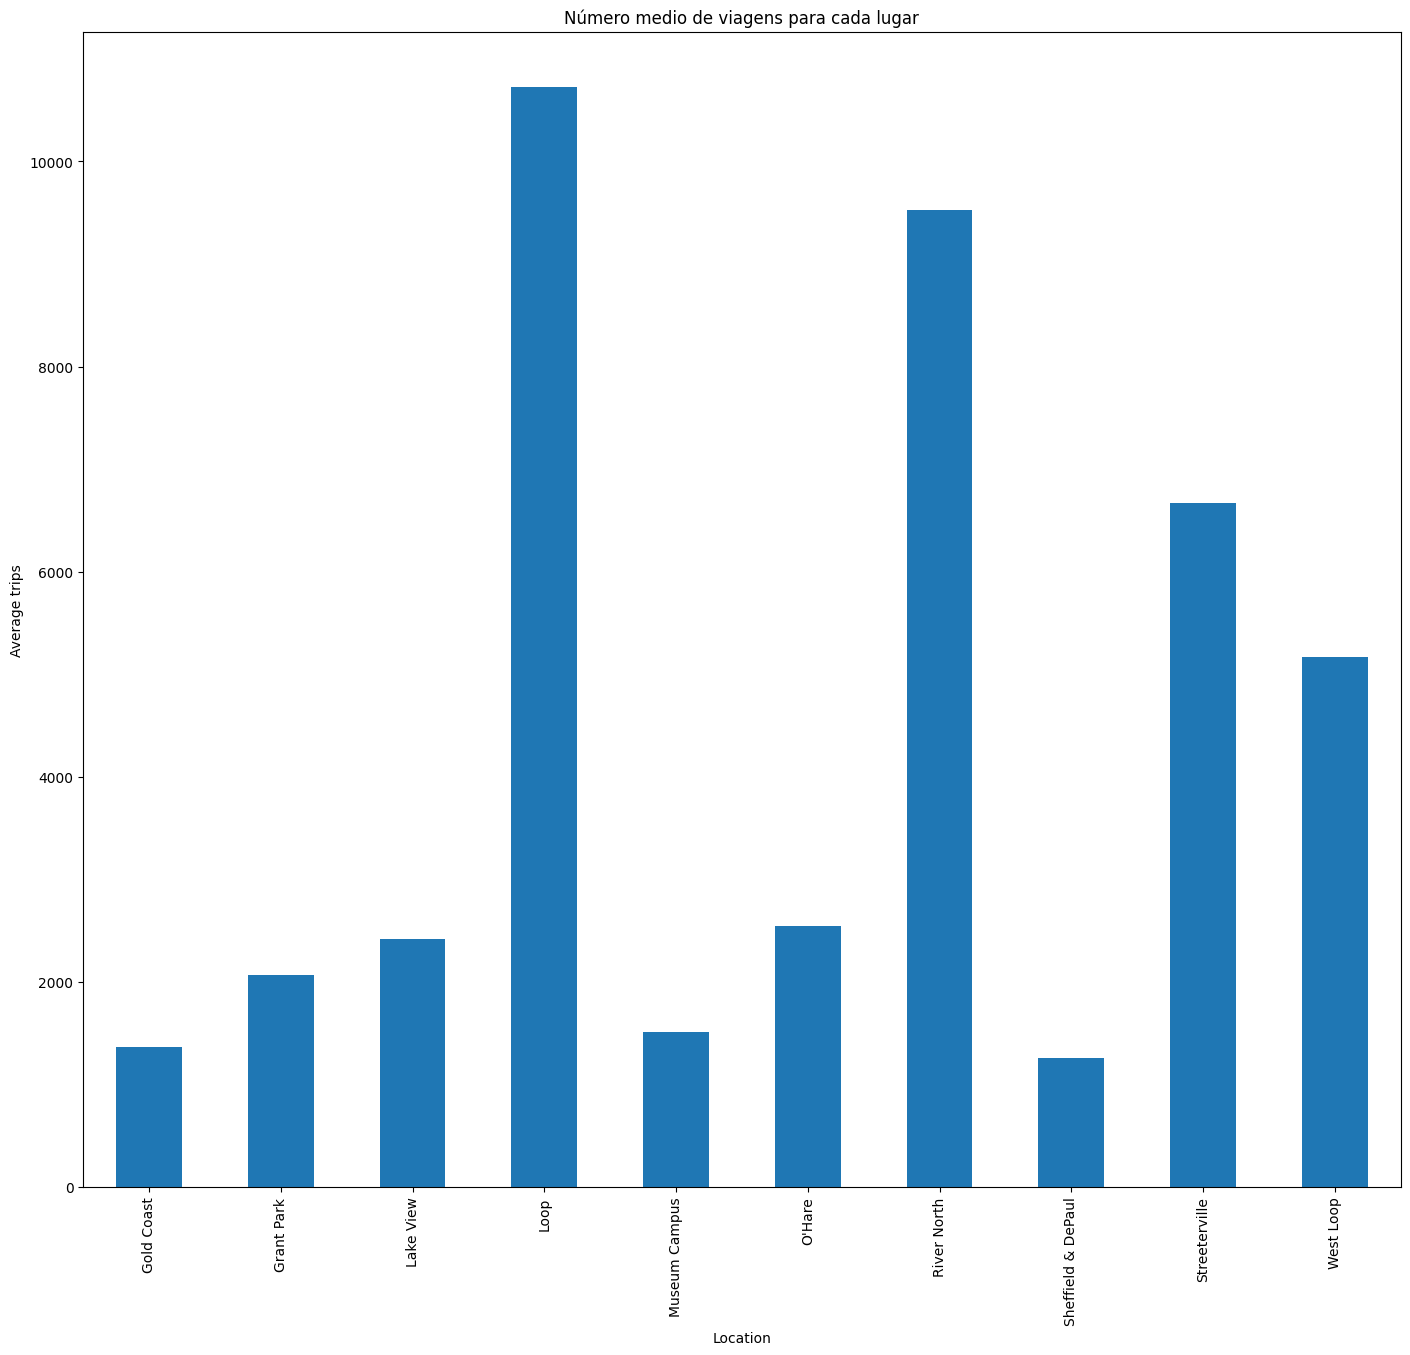

In [11]:
group_neighbor = results_04_sort.groupby('dropoff_location_name')['average_trips'].sum()
group_neighbor.plot(xlabel='Location',
                 ylabel='Average trips',
                 x='dropoff_location_name',
                 y='average_trips',
                 kind = 'bar',
                 figsize=(17, 15),
                 title='Número medio de viagens para cada lugar')

plt.show()

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

O gráfico dos bairros deveria conter apenas os 10 principais bairros.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>



In [12]:
#Lendo o arquivo
data = pd.read_csv('/datasets/project_sql_result_07.csv')
data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [15]:
#Testando as hipoteses
alpha = 0.05

data['start_ts'] = pd.to_datetime(data['day_of_week'])
data['day_of_week'] = data['start_ts'].dt.dayofweek
saturday_data = data[data['day_of_week'] == 5]
saturday_rainy_data = saturday_data[saturday_data['weather_conditions'] == 'Good']
saturday_not_rainy_data = saturday_data[saturday_data['weather_conditions'] == 'Bad']
results = st.ttest_ind(saturday_rainy_data['duration_seconds'], saturday_not_rainy_data['duration_seconds'])

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print('Há evidências estatisticamente significativas para rejeitar a hipótese nula.')
    print('Portanto, a hipótese de que a doração média das viagens do Loop para o Aeroporto Internacional O\'Hare muda nos sábados chuvosos pode ser aceita.')

else:
    print('Não há evidências estatisticamente significantes para rejeitar a hipótese nula.')
    print('Portanto, a hipótese de que a duração média dos viagens do Loop para o Aeroporto Internacional O\'Hare muda nos sábados chuvosos não pode ser aceita.')

valor-p: 6.517970327099473e-12
Há evidências estatisticamente significativas para rejeitar a hipótese nula.
Portanto, a hipótese de que a doração média das viagens do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos pode ser aceita.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

O código acima resultou em um erro.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Há um erro nessa interpretação. Quando o p-valor é inferior ao alpha estabelecido devemos rejeitar H0 em favor de H1. Pode revisar por favor?
</div>

